<a href="https://colab.research.google.com/github/farhnsaptr/DIF62130_B_25_2311532018/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Logistic regression adalah sebuah algoritma supervised machine dimana algoritma ini bertujuan untuk mengklasifikasikan dan memprekdiksi probabilitas bahwa sebuah data tes yang diberikan berada dalam satu kelas tersebut atau tidak. Logistic regression adalah sebuah algoritma statistik bertujuan untuk menganalisa relasi antara faktor dua data.

Logistic regression digunakan untuk klasifikasi biner di mana menggunakan fungsi sigmoid, yang mengambil input sebagai variabel independen dan menghasilkan nilai probabilitas antara 0 dan 1.

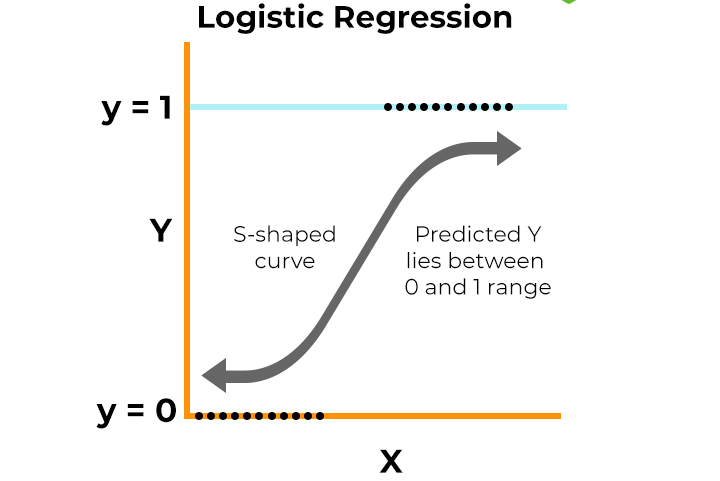

berikut adalah contoh visualisai dari sebuah logistic regression.

Pada praktikum kali ini, kita akan mempraktikan model logistic regression dari sebuah dataset tentang prediksi diabetes berdasarkan beberapa fitur. Dataset ini memiliki sebaha kolom label dimana label tersebut akan menjadi variabel bebas, dan memiliki beberapa kolom fitur dimana fitur tersebut akan menjadi variael terikat.

# 1. Import Library
Pertama-tama, kita akan mengimport seluruh library yang dibutuhkan dalam proses pemodelan data. Library yang dibutuhkan antara lain pandas untuk membaca dataset, sklearn untuk pemodelan, matplotlib dan seaborn untuk visualisasi data, dan numpy untuk operasi aritmatika.

kita juga akan mengimport dataset dari github yang telah dimasukan dalam repository penulis.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

dataset_url = "https://raw.githubusercontent.com/farhnsaptr/DIF62130_B_25_2311532018/refs/heads/main/Dataset/diabetes.csv"
df = pd.read_csv(dataset_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#2. Data understanding
Selanjutnya kita perlu memahami data yang kita miliki. Berdasarkan analisis, kita memiliki 768 data dan sembilan kolom, dimana satu kolom merupakan variabel target atau kolom label.

In [ ]:
df.shape

(768, 9)

Setelah dianalisis lebih lanjut, ternyata tidak ada null value dalam masing-masing kolom. Dapat dilihat juga bahwa seluruh tipe data merupakan numerik yang mana tipe data ini adalah tipe data yang kita butuhkan untuk melakukan logistic regression. Bisa kita simpulkan bahwa data sudah tergolong cukup bersih dan dapat lanjut ke tahap berikutnya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#3. Data Preparation
Selanjutnya, kita perlu membagi dataset menjadi 2 variabel, yaitu variabel X (variabel terikat) dan variabel y (variabel bebas).

In [ ]:
# Define features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Print the shapes of X and y to verify the split
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (768, 8)
Shape of y: (768,)


Sebelum memasukkan varabel ke model logistic regression, kita perlu membagi kembali menjadi 2 data, yaitu data testing dan data training

Data training adalah bagian dataset yang kita latih untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma ML lainnya sesuai tujuannya masing-masing. Kita memberikan petunjuk melalui algoritma agar mesin yang kita latih bisa mencari korelasinya sendiri.

Data testing adalah bagian dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.

Kita menggunakan library sklearn.model_selection method training_test_split untuk membagi data training dan data testing untuk memudahkan pemodelan menggunakan sklearn

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (537, 8)
Shape of X_test: (231, 8)
Shape of y_train: (537,)
Shape of y_test: (231,)


# 4. Modelling

Setelah kita membagi data, kita dapat memasukkan data ke model logistic regression. Pada praktikum ini, kita memasukkan method LogisticRegression kedalam variabel logreg dengan random state = 16

Random state digunakan untuk mengontrol proses acak yang terjadi dalam algoritma machine learning. Dengan menentukan nilai random_state, kita memastikan bahwa hasil yang dihasilkan oleh algoritma tersebut akan selalu sama setiap kali kode dijalankan. Ini berguna untuk memastikan hasil yang konsisten dan dapat direproduksi, terutama saat melakukan eksperimen atau debugging. Tanpa random_state, hasilnya bisa berbeda setiap kali dijalankan karena algoritma menggunakan proses acak yang berbeda. Misalnya, dalam pembagian data latih dan uji, atau dalam inisialisasi parameter model, random_state membantu menjaga konsistensi.



In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=16)

# Fit the model to the training data
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

Setelah kita latih data training dengan model logistic regression, kita perlu menguji apakah model sudah sesuai atau belum. caranya dengan menguji menggnakan variabel X_test di method logreg.predict().

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
X_test.shape

(231, 8)

# 5. Evaluation

Setelah kita menguji menggunakan logreg.predict(), kita perlu mengevaluasi hasil model menggunakan confussion matrix

Berikut adalah visualisasi confussion matrix:
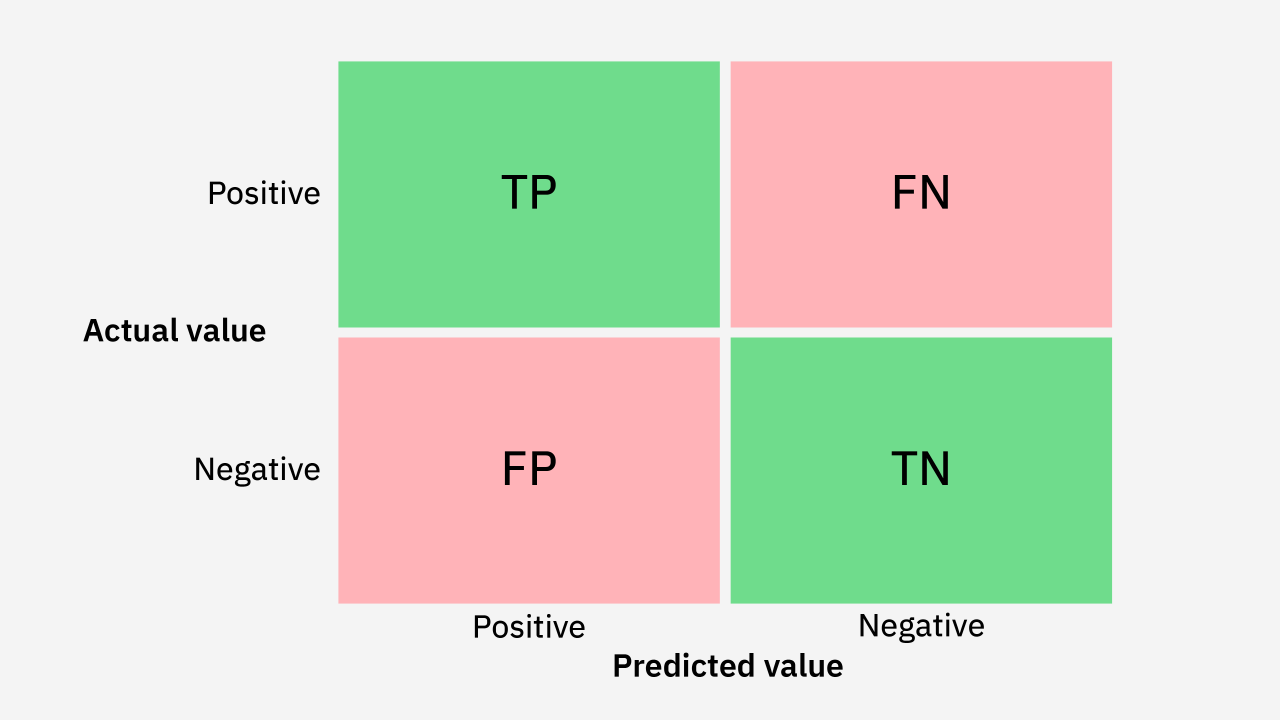

- True positive (TP)
Kasus di mana model benar memprediksi kelas positif. Contohnya dalam praktikum ini, model berhasil memprediksi seseorang bahwa dirinya mengidap diabetes.
- True negative (TN)
Kasus di mana model benar memprediksi kelas negatif. Contohnya dalam praktikum ini, model berhasil memprediksi seseorang bahwa dirinya tidak mengidap diabetes.
- False positive (FP)
Kasus di mana model salah memprediksi kelas positif Contohnya dalam praktikum ini, model memprediksi seseorang bahwa dirinya mengidap diabetes. Namun, faktanya dirinya tidak mengidap diabetes.
- False negative (FN)
Kasus di mana model salah memprediksi kelas negatif. Contohnya dalam praktikum ini, model memprediksi seseorang bahwa dirinya tidak mengidap diabetes. Namun, faktanya dirinya mengidap diabetes.

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[135,  12],
       [ 36,  48]])

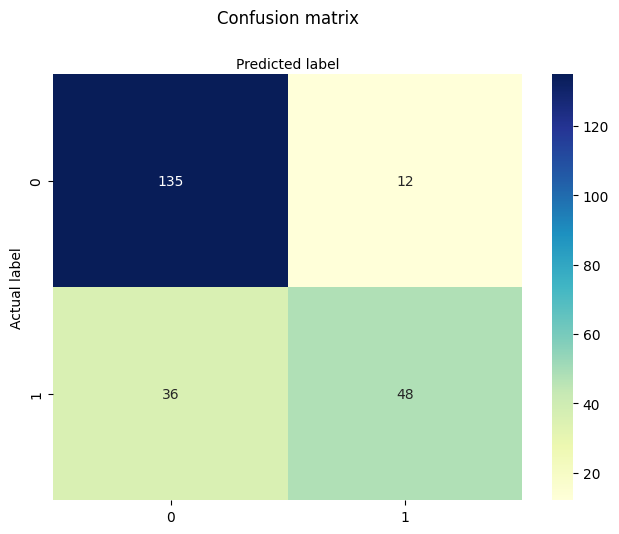

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


Selanjutnya, kita perlu melihat akurasi, recall, san f1 score dari model.

- Akurasi = mengukur seberapa sering model membuat prediksi yang benar secara keseluruhan.
- Recall = mengukur seberapa baik model dapat mengidentifikasi semua kasus positif yang sebenarnya (misalnya, pasien diabetes).
- F1-score = rata-rata harmonik dari precision dan recall. Ini berguna ketika kita ingin menyeimbangkan antara precision (seberapa akurat prediksi positif) dan recall (seberapa banyak kasus positif yang terdeteksi).

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       147
           1       0.80      0.57      0.67        84

    accuracy                           0.79       231
   macro avg       0.79      0.74      0.76       231
weighted avg       0.79      0.79      0.78       231



Untuk melihat lebih detail tentang hasil model kita, kita perlu mengukur ROC Curve dari hasil model.

ROC Curve (Receiver Operating Characteristic Curve) adalah grafik yang digunakan untuk menilai seberapa baik sebuah model klasifikasi (seperti prediksi penyakit atau spam) dapat membedakan antara dua kelompok, misalnya positif (ada penyakit) dan negatif (tidak ada penyakit). Grafik ini membandingkan dua hal: seberapa sering model benar mengidentifikasi kasus positif (True Positive Rate) dan seberapa sering model salah mengidentifikasi kasus negatif sebagai positif (False Positive Rate). Semakin dekat kurva ROC ke sudut kiri atas grafik, semakin baik performa model tersebut. Jika kurva mengikuti garis diagonal, artinya model tidak lebih baik daripada tebakan acak. Area Under Curve (AUC) adalah nilai yang merangkum performa ini; semakin mendekati 1, semakin baik modelnya.

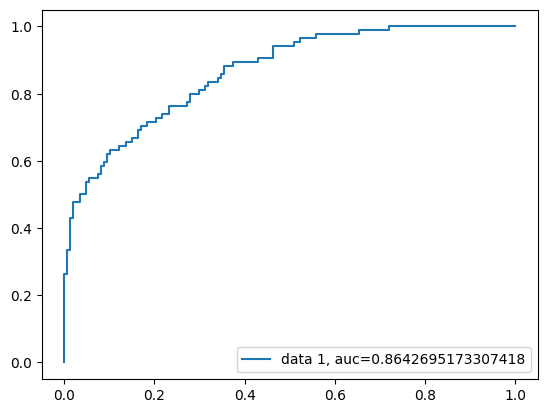

In [ ]:
y_pred_probba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probba)
auc = metrics.roc_auc_score(y_test, y_pred_probba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()